# Problem1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [2]:
import scipy.io as sio 
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier

In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [4]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [5]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [6]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [7]:
test_error_prob1=[] 
for c in ([2**i for i in range(-4,6)]):
    SVM=OneVsOneClassifier(svm.SVC(kernel='linear',C=c))
    SVM.fit(x_train_transformed_95,y_train)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_svm=sum(x_test_pred!=y_test)/len(y_test)
    test_error_prob1.append(error_svm)
print(test_error_prob1)

[0.07174887892376682, 0.07424015944195317, 0.07922272047832586, 0.0787244643746886, 0.07922272047832586, 0.07922272047832586, 0.07972097658196313, 0.0817140009965122, 0.08071748878923767, 0.08071748878923767]


In [8]:

lg=OneVsOneClassifier(LogisticRegression())
lg.fit(x_train_transformed_95,y_train)
x_test_pred=lg.predict(x_test_transformed_95)
test_error_lg_prob1=sum(x_test_pred!=y_test)/len(y_test)
print(test_error_lg_prob1)

0.07075236671649228


In [9]:
len(range(-4,6))

10

In [10]:
test_error_prob1_lg=np.repeat(test_error_lg_prob1,10)

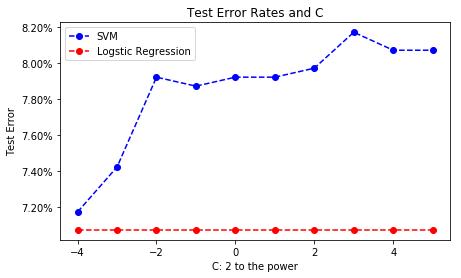

In [11]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

test_error_prob1_g,=plt.plot(range(-4,6),test_error_prob1,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)

test_error_prob1_lg_g,=plt.plot(range(-4,6),test_error_prob1_lg,color='red',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error Rates and C')
plt.xlabel('C: 2 to the power')
plt.ylabel('Test Error')

plt.legend([test_error_prob1_g,test_error_prob1_lg_g],["SVM","Logstic Regression"])

In [12]:
test_error_prob1_lg[0]

0.07075236671649228

In [13]:
data={'Error':[test_error_prob1_lg[0],test_error_prob1[0]]}

In [14]:
df=pd.DataFrame(data, index=['Logstic Regression','Min SVM Linear Kernel'], columns=['Error'])

In [15]:
df['Error'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Error']], index = df.index)

In [16]:
df

,Error
Logstic Regression,7.08%
Min SVM Linear Kernel,7.17%


# Problem 2

In [17]:
test_error_poly=[] 
for c in ([2**i for i in range(-4,6)]):
    SVM=OneVsOneClassifier(svm.SVC(kernel='poly',C=c,gamma=1,coef0=1,degree=3))
    SVM.fit(x_train_transformed_95,y_train)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_svm=sum(x_test_pred!=y_test)/len(y_test)
    test_error_poly.append(error_svm)
print(test_error_poly)

[0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454, 0.043348281016442454]


Text(0,0.5,'Test Error')

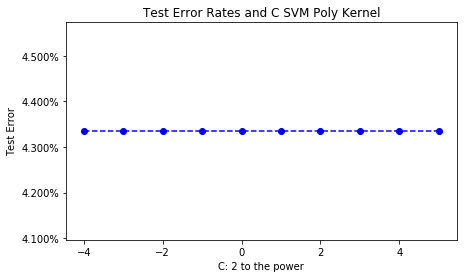

In [18]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(-4,6),test_error_poly,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error Rates and C SVM Poly Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Test Error')

# Problem 3

In [19]:
from sklearn.multiclass import OneVsRestClassifier

In [20]:
test_error_poly_ovr=[] 
for c in ([2**i for i in range(-4,6)]):
    SVM=OneVsRestClassifier(svm.SVC(kernel='poly',C=c,gamma=1,coef0=1,degree=3))
    SVM.fit(x_train_transformed_95,y_train)
    x_test_pred=SVM.predict(x_test_transformed_95)
    error_svm=sum(x_test_pred!=y_test)/len(y_test)
    test_error_poly_ovr.append(error_svm)
print(test_error_poly_ovr)

[0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064, 0.04185351270553064]


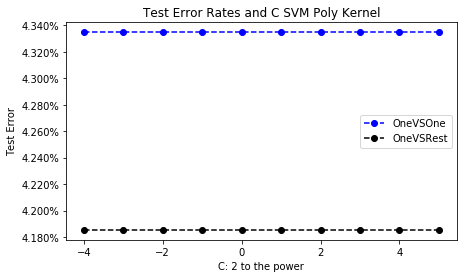

In [21]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)


ovo,=plt.plot(range(-4,6),test_error_poly,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ovr,=plt.plot(range(-4,6),test_error_poly_ovr,color='black',linestyle='dashed',marker='o',
        markerfacecolor='black',markersize=6)


ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error Rates and C SVM Poly Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Test Error')

plt.legend([ovo,ovr],['OneVSOne','OneVSRest'])

# Problem 4

In [22]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

In [23]:
from sklearn.utils import shuffle
usps_X_train95_shuffle, usps_y_train_shuffle = shuffle(x_train_transformed_95, y_train, n_samples = 100, random_state = 42)
print(usps_X_train95_shuffle.shape, usps_y_train_shuffle.shape)

(100, 88) (100,)


In [24]:
for i in range(10):
    print("There are %d samples in class %s" %(sum(usps_y_train_shuffle == i), i))

There are 15 samples in class 0
There are 11 samples in class 1
There are 9 samples in class 2
There are 10 samples in class 3
There are 11 samples in class 4
There are 11 samples in class 5
There are 6 samples in class 6
There are 13 samples in class 7
There are 8 samples in class 8
There are 6 samples in class 9


In [25]:
usps_shuffle = np.column_stack((usps_X_train95_shuffle, usps_y_train_shuffle))
usps_shuffle.shape

(100, 89)

In [26]:
from sklearn.neighbors import KDTree

In [27]:
tree0 = KDTree(x_train_transformed_95[y_train == 0], leaf_size=2, metric = 'euclidean')
tree1 = KDTree(x_train_transformed_95[y_train == 1], leaf_size=2, metric = 'euclidean')
tree2 = KDTree(x_train_transformed_95[y_train == 2], leaf_size=2, metric = 'euclidean')
tree3 = KDTree(x_train_transformed_95[y_train == 3], leaf_size=2, metric = 'euclidean')
tree4 = KDTree(x_train_transformed_95[y_train == 4], leaf_size=2, metric = 'euclidean')
tree5 = KDTree(x_train_transformed_95[y_train == 5], leaf_size=2, metric = 'euclidean')
tree6 = KDTree(x_train_transformed_95[y_train == 6], leaf_size=2, metric = 'euclidean')
tree7 = KDTree(x_train_transformed_95[y_train == 7], leaf_size=2, metric = 'euclidean')
tree8 = KDTree(x_train_transformed_95[y_train == 8], leaf_size=2, metric = 'euclidean')
tree9 = KDTree(x_train_transformed_95[y_train == 9], leaf_size=2, metric = 'euclidean')



In [28]:
from sklearn.neighbors import KDTree

dist0, ind0 = tree0.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 0], k=7) 
dist1, ind1 = tree1.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 1], k=7) 
dist2, ind2 = tree2.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 2], k=7) 
dist3, ind3 = tree3.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 3], k=7) 
dist4, ind4 = tree4.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 4], k=7) 
dist5, ind5 = tree5.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 5], k=7) 
dist6, ind6 = tree6.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 6], k=7) 
dist7, ind7 = tree7.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 7], k=7) 
dist8, ind8 = tree8.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 8], k=7) 
dist9, ind9 = tree9.query(usps_X_train95_shuffle[usps_shuffle[:,88] == 9], k=7) 
dist0.shape, ind0.shape, dist1.shape, ind1.shape

((15, 7), (15, 7), (11, 7), (11, 7))

In [29]:
#calculate signma
dist_matrix = np.row_stack((dist0, dist1, dist2, dist3, dist4, dist5, dist6, dist7, dist8, dist9))
sigma_cal = np.mean(dist_matrix[:,6])
print(sigma_cal)

6.7514388237909655


In [30]:
#calculate gamma
gamma_cal = 1/(2*sigma_cal**2)
print(gamma_cal)

0.010969260006709065


In [31]:
svm_error_gaussian = []
c_range=([2**i for i in range(-4,6)])
for c in c_range:
    svm_gaussian = OneVsOneClassifier(svm.SVC(kernel='rbf',C=c, gamma=gamma_cal)).fit(x_train_transformed_95, y_train)
    y_pred = svm_gaussian.predict(x_test_transformed_95)
    error = 1 - accuracy_score(y_test, y_pred)
    svm_error_gaussian.append(error)
print(svm_error_gaussian)

[0.08918784255107126, 0.07523667164922765, 0.06178375685102144, 0.05331340308918786, 0.04882909815645242, 0.04583956153462876, 0.04384653712007969, 0.04484304932735428, 0.04484304932735428, 0.04484304932735428]


In [39]:
min(svm_error_gaussian)

0.04384653712007969

Text(0,0.5,'Test Error')

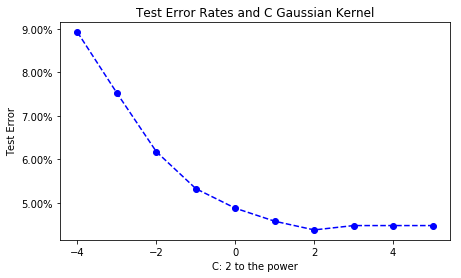

In [32]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(-4,6),svm_error_gaussian,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error Rates and C Gaussian Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Test Error')

In [33]:
def KW(x):
    w = np.exp(-x**2/(2*sigma_cal**2))
    return w

In [34]:
knn_error = []
for k in range(3,11):
    knn = KNeighborsClassifier(n_neighbors = k, weights = KW)
    knn.fit(x_train_transformed_95, y_train)
    pred = knn.predict(x_test_transformed_95)
    test_scores= 1 - accuracy_score(y_test, pred)
    knn_error.append(test_scores)
    
print(knn_error)

[0.05231689088191327, 0.0503238664673642, 0.05082212257100149, 0.05082212257100149, 0.05331340308918786, 0.05430991529646234, 0.05680119581464871, 0.05979073243647237]


Text(0,0.5,'Test Error')

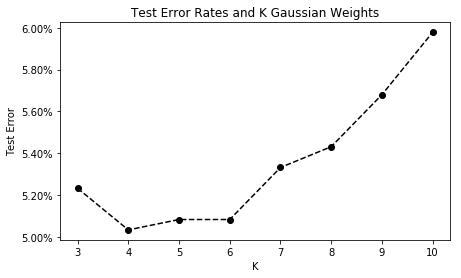

In [35]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

plt.plot(range(3,11),knn_error,color='black',linestyle='dashed',marker='o',
        markerfacecolor='black',markersize=6)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error Rates and K Gaussian Weights')
plt.xlabel('K')
plt.ylabel('Test Error')

# Problem 5

In [36]:
svm_error_gaussian_ovr = []
c_range=([2**i for i in range(-4,6)])
for c in c_range:
    svm_gaussian = OneVsRestClassifier(svm.SVC(kernel='rbf',C=c, gamma=gamma_cal)).fit(x_train_transformed_95, y_train)
    y_pred = svm_gaussian.predict(x_test_transformed_95)
    error = 1 - accuracy_score(y_test, y_pred)
    svm_error_gaussian_ovr.append(error)
print(svm_error_gaussian_ovr)

[0.08570004982561041, 0.06776283009466866, 0.06028898854010967, 0.05231689088191327, 0.04882909815645242, 0.046337817638266054, 0.04484304932735428, 0.04434479322371698, 0.04434479322371698, 0.04434479322371698]


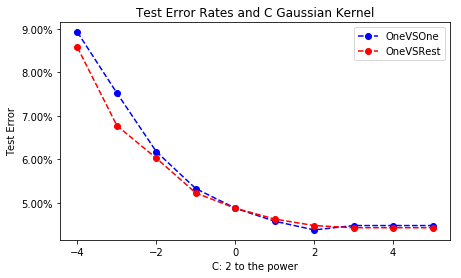

In [37]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

g1,=plt.plot(range(-4,6),svm_error_gaussian,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
g2,=plt.plot(range(-4,6),svm_error_gaussian_ovr,color='red',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=6)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Test Error Rates and C Gaussian Kernel')
plt.xlabel('C: 2 to the power')
plt.ylabel('Test Error')


plt.legend([g1,g2],['OneVSOne','OneVSRest'])

In [38]:
min(svm_error_gaussian),min(svm_error_gaussian_ovr)

(0.04384653712007969, 0.04434479322371698)